In [1]:
!pip install torch
!pip install matplotlib
!pip install yfinance
!pip install numpy

import numpy as np
from matplotlib import pyplot as plt

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
import yfinance as yf

#ONLY CHANGE THINGS INSIDE HERE

stockChosenTicker = "NVDA"
inputBatchSize = 100
outputBatchSize = 10
numberOfEpochs = 500
learningRate = 0.001
dropout = 0.1

#ONLY CHANGE THINGS INSIDE HERE


stockChosen = yf.Ticker(stockChosenTicker)

df = stockChosen.history(period="10y")

df.drop(columns=['Stock Splits'], inplace=True)

df.drop(columns=['Dividends'], inplace=True)

X, y = df.drop(columns=['Close']), df.Close.values

stockChosenShowingFinancials = stockChosen

print("PICK TOP/2024 VALUE FOR THESE 4 DATA POINTS")
print(stockChosenShowingFinancials.income_stmt.loc['Total Expenses'])
print(stockChosenShowingFinancials.income_stmt.loc['Total Revenue'])
print(stockChosenShowingFinancials.income_stmt.loc['Net Income'])
print(stockChosenShowingFinancials.income_stmt.loc['Basic EPS'])
#ALSO RECORD THESE FINANCIAL DATA POINTS

PICK TOP/2024 VALUE FOR THESE 4 DATA POINTS
2024-01-31    27950000000.0
2023-01-31    21397000000.0
2022-01-31    16873000000.0
2021-01-31    12143000000.0
Name: Total Expenses, dtype: object
2024-01-31    60922000000.0
2023-01-31    26974000000.0
2022-01-31    26914000000.0
2021-01-31    16675000000.0
Name: Total Revenue, dtype: object
2024-01-31    29760000000.0
2023-01-31     4368000000.0
2022-01-31     9752000000.0
2021-01-31     4332000000.0
Name: Net Income, dtype: object
2024-01-31    12.05
2023-01-31     1.76
2022-01-31     3.91
2021-01-31    1.755
Name: Basic EPS, dtype: object


In [3]:
"""
plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("price over time")
plt.savefig("initial_plot.png", dpi=250)
plt.show();
"""

'\nplt.plot(y)\nplt.xlabel("Time")\nplt.ylabel("Price")\nplt.title("price over time")\nplt.savefig("initial_plot.png", dpi=250)\nplt.show();\n'

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

"""
print("X shape is:", X.shape)
print("y is:", y)
print("X shape after fit transform is:", X_trans.shape)
print("y after fit transform is:", y_trans)

print(X_trans.shape)
print(y_trans.shape)
print(X_trans[-20:][0])
"""

'\nprint("X shape is:", X.shape)\nprint("y is:", y)\nprint("X shape after fit transform is:", X_trans.shape)\nprint("y after fit transform is:", y_trans)\n\nprint(X_trans.shape)\nprint(y_trans.shape)\nprint(X_trans[-20:][0])\n'

In [5]:
# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, inputBatchSize, outputBatchSize)

"""
print("X_ss is:", X_ss)
print("X_trans is:", X_trans[-15:])

print("y_ss is:", y_mm)
print("y_trans is:", y_trans[100])



print("X_ss shape is:", X_ss.shape)


print("y_ss shape is:", y_mm.shape)

"""





'\nprint("X_ss is:", X_ss)\nprint("X_trans is:", X_trans[-15:])\n\nprint("y_ss is:", y_mm)\nprint("y_trans is:", y_trans[100])\n\n\n\nprint("X_ss shape is:", X_ss.shape)\n\n\nprint("y_ss shape is:", y_mm.shape)\n\n'

In [6]:

X_train = X_ss[:-150]
X_test = X_ss[-150:]

y_train = y_mm[:-150]
y_test = y_mm[-150:]



In [7]:
import torch

X_train_tensors = torch.Tensor(X_train)
X_test_tensors = torch.Tensor(X_test)

y_train_tensors = torch.Tensor(y_train)
y_test_tensors = torch.Tensor(y_test)

In [8]:
# reshaping to rows, timestamps, features
X_train_tensors_final = torch.reshape(X_train_tensors,
                                      (X_train_tensors.shape[0], inputBatchSize,
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,
                                     (X_test_tensors.shape[0], inputBatchSize,
                                      X_test_tensors.shape[2]))

In [9]:
import torch.nn as nn

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # number of features/outputs in hidden state
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=dropout) # lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) # fully connected
        self.fc_2 = nn.Linear(128, num_classes) # fully connected last layer
        self.relu = nn.ReLU()

    def forward(self,x):
        # hidden state
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        # cell state
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

In [10]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train, X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        #test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)

        #commenting out as the dummies may get confused
        """
        if epoch % 10 == 0:
          print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch, loss.item(), test_loss.item()))
        """


In [11]:
import warnings
warnings.filterwarnings('ignore')

n_epochs = numberOfEpochs # 1000 epochs
learning_rate = learningRate # 0.001 lr

#HAVE CHANGED FROM 4 TO 5 TO SEE IF FIT THROWN
input_size = 4 # number of features
hidden_size = 2 # number of features/outputs in hidden state(short-term memory)
num_layers = 1 # number of stacked lstm layers

num_classes = outputBatchSize # number of output classes (timesteps)

train_and_review_lstm = LSTM(num_classes,
              input_size,
              hidden_size,
              num_layers)

In [12]:
loss_fn = torch.nn.MSELoss()    #mean-squared error for regression
optimiser = torch.optim.Adam(train_and_review_lstm.parameters(), lr=learning_rate)

training_loop(n_epochs=n_epochs,
              lstm=train_and_review_lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train_tensors_final,
              y_train=y_train_tensors,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors)

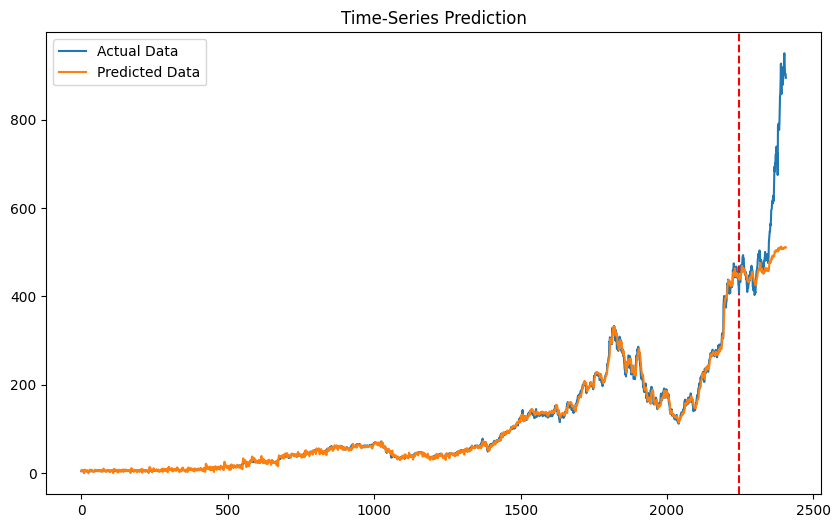

In [13]:
testing_X_trans = ss.transform(df.drop(columns=['Close'])) # old transformers
testing_y_trans = mm.transform(df.Close.values.reshape(-1, 1)) # old transformers

"""
print(testing_X_trans.shape)
print(testing_y_trans.shape)
"""

# split the sequence
testing_X_trans, testing_y_trans = split_sequences(testing_X_trans, testing_y_trans, inputBatchSize, outputBatchSize)

"""
print(testing_X_trans.shape)
print(testing_y_trans.shape)
"""


# converting to tensors
testing_X_trans = torch.Tensor(testing_X_trans)
testing_y_trans = torch.Tensor(testing_y_trans)


# reshaping the dataset
testing_X_trans = torch.reshape(testing_X_trans, (testing_X_trans.shape[0], inputBatchSize, testing_X_trans.shape[2]))

"""
print(testing_X_trans.shape)
print(testing_y_trans.shape)
"""

train_predict = train_and_review_lstm(testing_X_trans) # forward pass

"""
print("train predict is:", train_predict)
print("shape of train predict is:", train_predict.shape)

"""

data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = testing_y_trans.data.numpy()

"""

print("shape of data predict is:", data_predict.shape)
print("shape of dataY plot is:", dataY_plot.shape)
"""

data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
"""
print("shape of data predict is:", data_predict.shape)
print("shape of dataY plot is:", dataY_plot.shape)

print("data predict is:", data_predict)
print("dataY plot is:", dataY_plot)

print("len datay plot is:", len(dataY_plot))
"""
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
#for i in range(1,len(dataY_plot[-1])):
    #true.append(dataY_plot[-1][i])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
#for i in range(1,len(data_predict[-1])):
    #true.append(data_predict[-1][i])


plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=len(dataY_plot)-160, c='r', linestyle='--') # size of the training set
plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show()


In [14]:
"""
print(X_test_tensors_final.shape)
test_predict = train_and_review_lstm(X_test_tensors_final[0].unsqueeze(0)) # get the last sample, was X_test_tensors_final[-1].unsqueeze()
print(test_predict.shape)

test_predict = test_predict.detach().numpy()
test_predict = mm.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

test_target = y_test_tensors[0].detach().numpy() # last sample again
test_target = mm.inverse_transform(test_target.reshape(1, -1))
test_target = test_target[0].tolist()

plt.plot(test_target, label="Actual Data")
plt.plot(test_predict, label="LSTM Predictions")
plt.savefig("small_plot.png", dpi=300)
plt.axvline(x=0, c='r', linestyle='--')
plt.show();
"""

'\nprint(X_test_tensors_final.shape)\ntest_predict = train_and_review_lstm(X_test_tensors_final[0].unsqueeze(0)) # get the last sample, was X_test_tensors_final[-1].unsqueeze()\nprint(test_predict.shape)\n\ntest_predict = test_predict.detach().numpy()\ntest_predict = mm.inverse_transform(test_predict)\ntest_predict = test_predict[0].tolist()\n\ntest_target = y_test_tensors[0].detach().numpy() # last sample again\ntest_target = mm.inverse_transform(test_target.reshape(1, -1))\ntest_target = test_target[0].tolist()\n\nplt.plot(test_target, label="Actual Data")\nplt.plot(test_predict, label="LSTM Predictions")\nplt.savefig("small_plot.png", dpi=300)\nplt.axvline(x=0, c=\'r\', linestyle=\'--\')\nplt.show();\n'

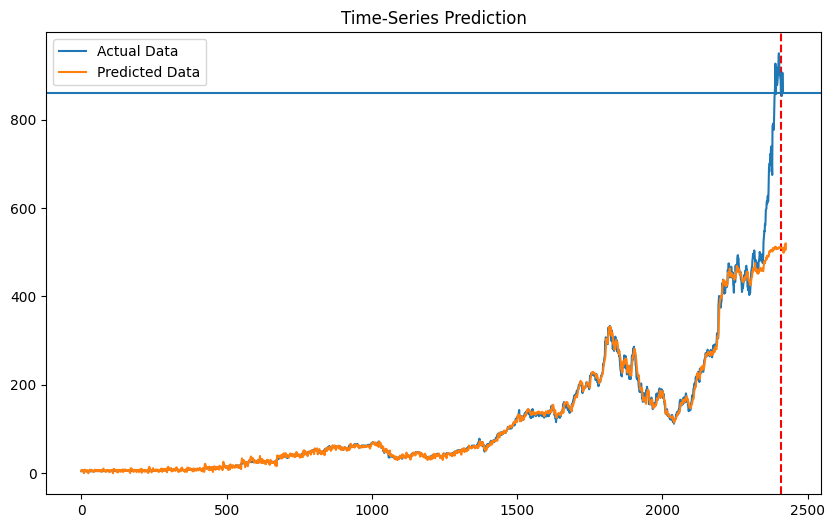

[894.52   889.64   859.05   880.08   871.33   853.5399 870.39   906.16
 881.86   860.01  ]


START OF PREDICTIONS


*Predicted prices for the next ten days*
[509.78265 498.7264  504.71912 503.77942 502.92303 511.0005  518.06274
 504.6439  506.95563 519.5787 ]
*Predicted prices for the next ten days*


END OF PREDICTIONS




In [15]:

X_actual_test_tensors, y_actual_test_tensors = split_sequences(X_trans, y_trans, inputBatchSize, outputBatchSize)

X_actual_test_tensors = torch.Tensor(X_actual_test_tensors)
y_actual_test_tensors = torch.Tensor(y_actual_test_tensors)

n_epochs = 150

"""
training_loop(n_epochs=n_epochs,
              lstm=train_and_review_lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_actual_test_tensors,
              y_train=y_actual_test_tensors,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors)
"""

X_actual_prediction, empty = split_sequences(X_trans, y_trans, inputBatchSize, 0)

X_actual_prediction = torch.Tensor(X_actual_prediction)


X_actual_prediction = torch.reshape(X_actual_prediction, (X_actual_prediction.shape[0], inputBatchSize, X_actual_prediction.shape[2]))

actual_predict = train_and_review_lstm(X_actual_prediction) # forward pass

"""
print("train predict is:", actual_predict)
"""

data_predict = actual_predict.data.numpy() # numpy conversion
dataY_plot = testing_y_trans.data.numpy()

"""
print(data_predict.shape)
print(dataY_plot.shape)
"""

data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)


"""
print("data predict is;", data_predict)
print("datay is:", dataY_plot)
"""

true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(1,len(dataY_plot[-1])):
    true.append(dataY_plot[-1][i])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
for i in range(1,len(data_predict[-1])):
    preds.append(data_predict[-1][i])


plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=len(dataY_plot), c='r', linestyle='--') # size of the training set
plt.axhline(y=dataY_plot[-1][-1])
plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("whole_plot.png", dpi=300)
plt.show()

print(dataY_plot[-1])

print("""

START OF PREDICTIONS

""")
print("*Predicted prices for the next ten days*")
print(data_predict[-1])
print("*Predicted prices for the next ten days*")

print("""

END OF PREDICTIONS

""")

#RECORD THESE PREDICTIONS